In [90]:
#Importing 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder as encoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz

In [91]:
my_data = pd.read_csv('titanic-passengers.csv', sep=';')
my_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [92]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [93]:
my_data.isnull().sum() #Finding missing information

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [94]:
#Replacing missing information

my_data['Embarked'].fillna(my_data['Embarked'].value_counts().index[0], inplace = True)
my_data['Cabin'].fillna(my_data['Cabin'].value_counts().index[0], inplace = True)
my_data['Age'].fillna(my_data['Age'].mean(), inplace=True)

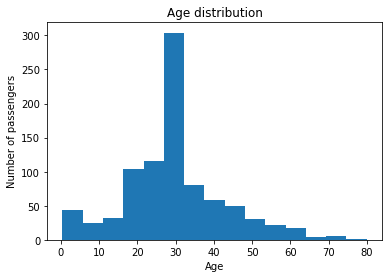

In [95]:
plt.hist(my_data['Age'], bins=15)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Number of passengers")
plt.show()

Text(0, 0.5, 'Number of passengers')

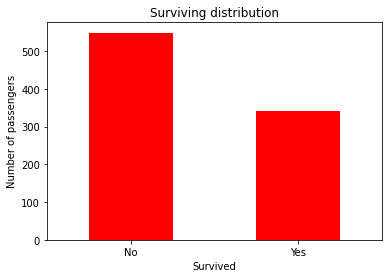

In [96]:
my_data['Survived'].value_counts().plot.bar(rot=0, color='Red')
plt.title("Surviving distribution")
plt.xlabel("Survived")
plt.ylabel("Number of passengers")

Text(0, 0.5, 'Number of passengers')

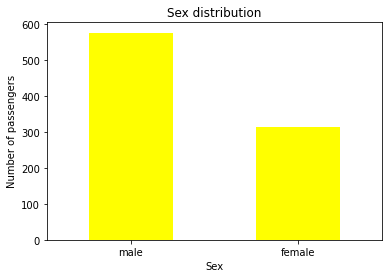

In [97]:
my_data['Sex'].value_counts().plot.bar(rot=0, color='Yellow')
plt.title("Sex distribution")
plt.xlabel("Sex")
plt.ylabel("Number of passengers")

Text(0, 0.5, 'Number of passengers')

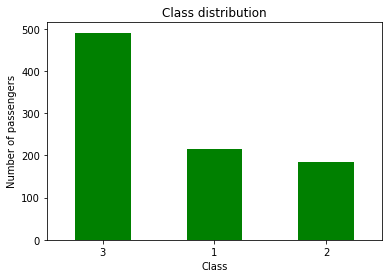

In [98]:
my_data['Pclass'].value_counts().plot.bar(rot=0, color='Green')
plt.title("Class distribution")
plt.xlabel("Class")
plt.ylabel("Number of passengers")

Text(0, 0.5, 'Number of passengers')

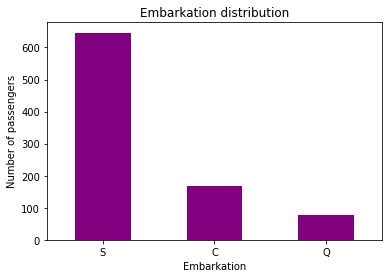

In [99]:
my_data['Embarked'].value_counts().plot.bar(rot=0, color='purple')
plt.title("Embarkation distribution")
plt.xlabel("Embarkation")
plt.ylabel("Number of passengers")

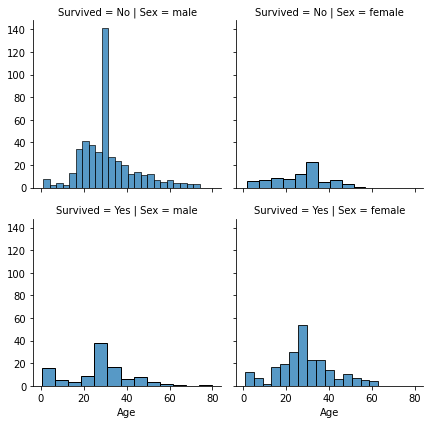

In [100]:
cor = sns.FacetGrid(my_data, row='Survived', col="Sex")
cor.map(sns.histplot, 'Age')
cor.add_legend()

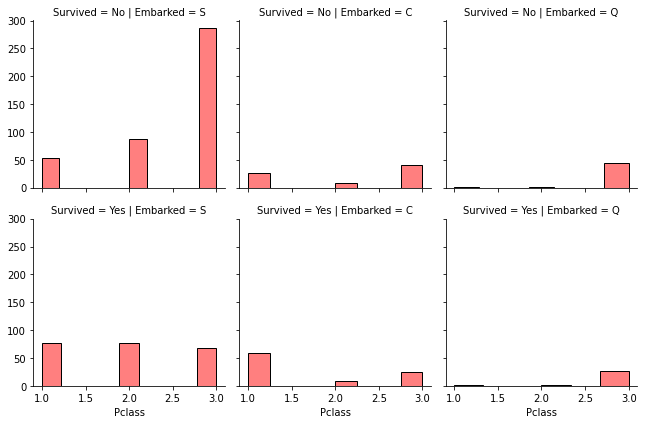

In [101]:
cor = sns.FacetGrid(my_data, row='Survived', col="Embarked")
cor.map(sns.histplot, 'Pclass', alpha=.5, color='red')
cor.add_legend()

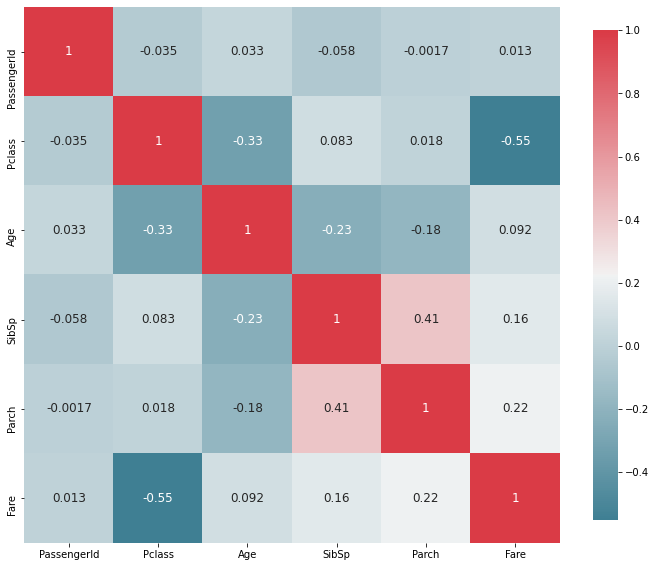

In [102]:
def plot_correlation_map( df ):

    corr = df.corr() #Getting the correlation of the values in the dataset's columns.

    s , ax = plt.subplots( figsize =( 12 , 10 ) ) #Creating a plot that returns the figure to s and the axes to ax.

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True ) #Creating a palette that diverges between 2 colors blue and red (220 and 10).
     

    s = sns.heatmap( #Draws the heat map in the figure

        corr, #The data shown in the map

        cmap = cmap, #Attributing

        square=True, #Making the cells square shaped by making the axes equal

        cbar_kws={ 'shrink' : .9 }, #Shrinking the colormap size

        ax=ax, #Adding the figures' axes as the heatmap's axes

        annot = True, #Writing the data values on the cells

        annot_kws = { 'fontsize' : 12 } #Changing the fontsize of the data values

        )
plot_correlation_map(my_data)

In [103]:
my_data['Survived'] = encoder().fit_transform(my_data['Survived'])
my_data.groupby(["Pclass", "Survived"], as_index=True).mean()

PassengerId        Age     SibSp     Parch       Fare
Pclass Survived                                                       
1      0          410.300000  40.896074  0.287500  0.300000  64.684008
       1          491.772059  34.784615  0.492647  0.389706  95.608029
2      0          452.123711  33.266947  0.319588  0.144330  19.412328
       1          439.080460  26.076166  0.494253  0.643678  22.055700
3      0          453.580645  27.417500  0.672043  0.384409  13.669364
       1          394.058824  23.232689  0.436975  0.420168  13.694887

In [104]:
new_data = my_data.drop(['Name', 'PassengerId', 'Cabin', 'Ticket'], axis=1)
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,male,28.0,0,0,13.0000,S
1,0,3,male,25.0,0,0,7.6500,S
2,0,3,male,20.0,0,0,7.8542,S
3,0,3,female,29.0,0,4,21.0750,S
4,0,1,male,31.0,1,0,52.0000,S


In [105]:
titles = []
for x in my_data["Name"] :
  x = x.split(',')[1].split('.')[0]
  titles.append(x)
title_col = pd.Series(titles, name='Title')
my_data = new_data.join(title_col)
my_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,male,28.0,0,0,13.0000,S,Mr
1,0,3,male,25.0,0,0,7.6500,S,Mr
2,0,3,male,20.0,0,0,7.8542,S,Mr
3,0,3,female,29.0,0,4,21.0750,S,Mrs
4,0,1,male,31.0,1,0,52.0000,S,Mr


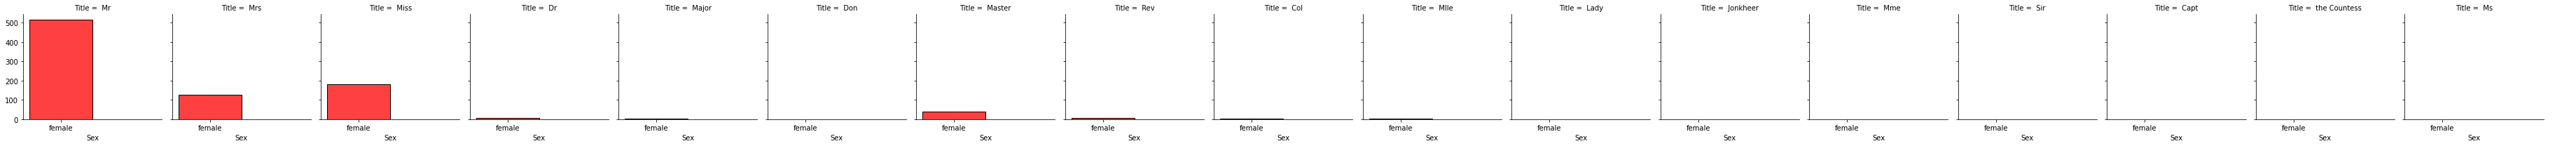

In [106]:
cor = sns.FacetGrid(my_data, col="Title")
cor.map(sns.histplot, 'Sex', color='red')
cor.add_legend()

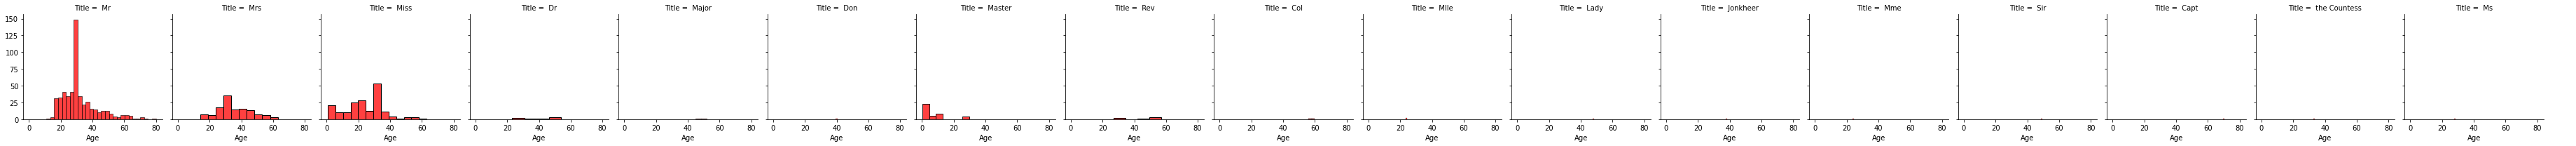

In [107]:
cor = sns.FacetGrid(my_data, col="Title")
cor.map(sns.histplot, 'Age', color='red')
cor.add_legend()

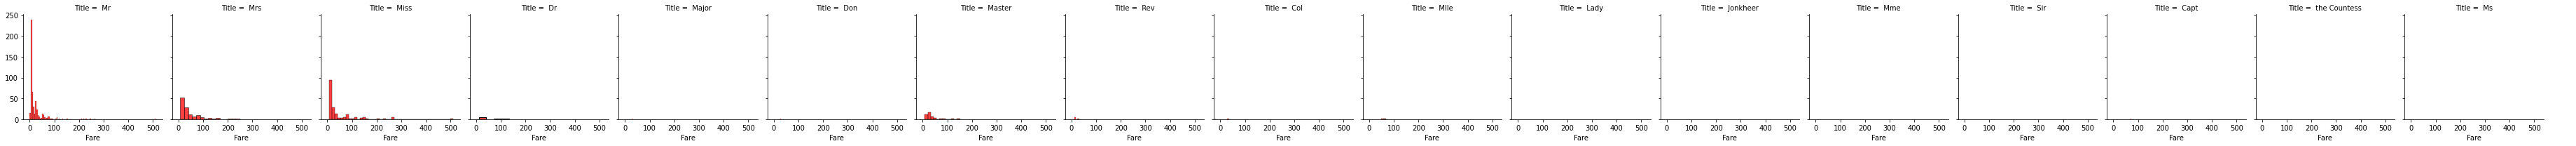

In [108]:
cor = sns.FacetGrid(my_data, col="Title")
cor.map(sns.histplot, 'Fare', color='red')
cor.add_legend()

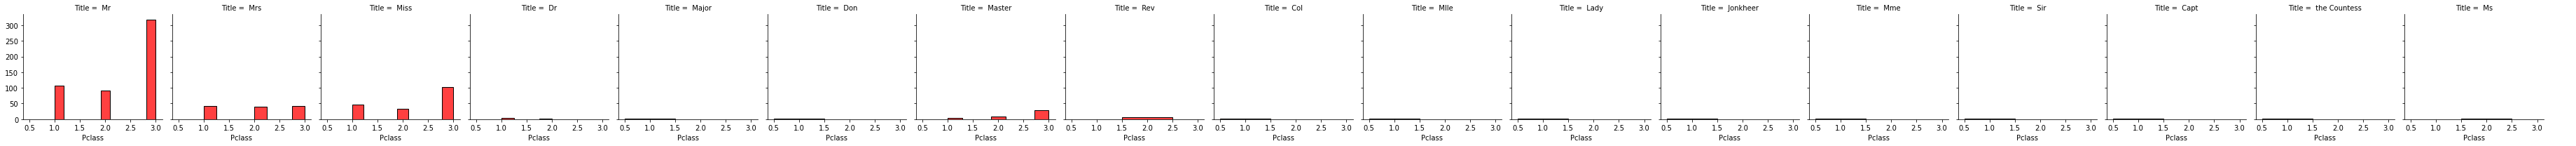

In [109]:
cor = sns.FacetGrid(my_data, col="Title")
cor.map(sns.histplot, 'Pclass', color='red')
cor.add_legend()

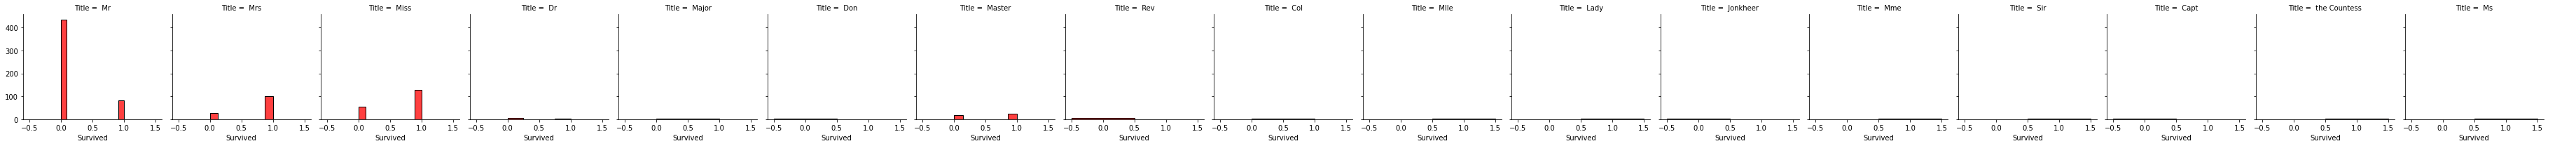

In [110]:
cor = sns.FacetGrid(my_data, col="Title")
cor.map(sns.histplot, 'Survived', color='red')
cor.add_legend()

In [111]:
Title_Dictionary = {'Title' : {"Capt":"Officer",
                                "Col":"Officer",
                                "Major":"Officer",
                                "Dr":"Officer",
                                "Rev":"Officer",
                                "Jonkheer":"Royalty",
                                "Don":"Royalty",
                                "Sir" :"Royalty",
                                "Lady" :"Royalty",
                                "the Countess":"Royalty",
                                "Dona":"Royalty",
                                "Mme":"Miss",
                                "Mlle":"Miss",
                                "Miss" :"Miss",
                                "Ms":"Mrs",
                                "Mr" :"Mrs",
                                "Mrs" :"Mr",
                                "Master" :"Master"} }
my_data.replace(Title_Dictionary, inplace=True, regex=True)
my_data['Title'].value_counts()

 Mrs        643
 Miss       185
 Master      40
 Officer     18
 Royalty      5
Name: Title, dtype: int64

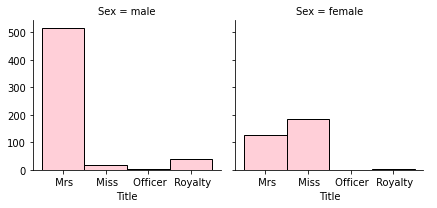

In [112]:
cor = sns.FacetGrid(my_data, col="Sex")
cor.map(sns.histplot, 'Title', color='pink')
cor.add_legend()

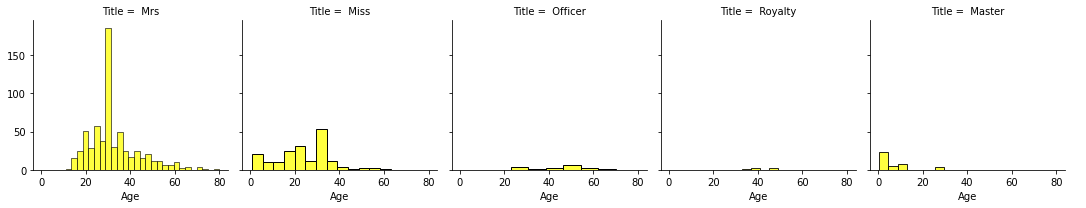

In [113]:
cor = sns.FacetGrid(my_data, col="Title")
cor.map(sns.histplot, 'Age', color='yellow')
cor.add_legend()

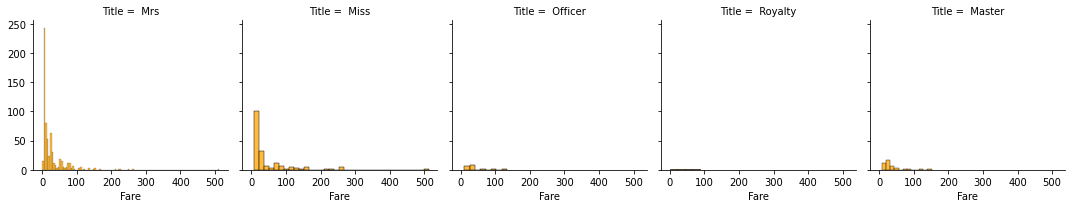

In [114]:
cor = sns.FacetGrid(my_data, col="Title")
cor.map(sns.histplot, 'Fare', color='orange')
cor.add_legend()

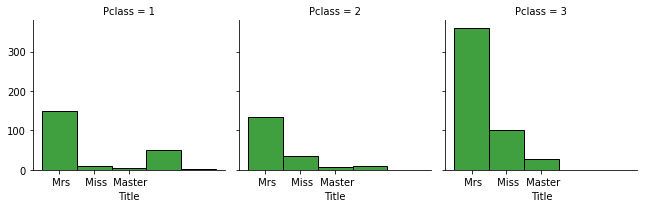

In [115]:
cor = sns.FacetGrid(my_data, col="Pclass")
cor.map(sns.histplot, 'Title', color='green')
cor.add_legend()

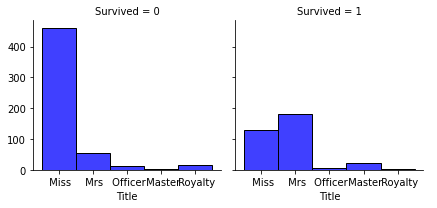

In [116]:
cor = sns.FacetGrid(my_data, col="Survived")
cor.map(sns.histplot, 'Title', color='blue')
cor.add_legend()

In [117]:
my_data['FamilySize'] = my_data['Parch'] + my_data['SibSp']
my_data = my_data.drop(['SibSp', 'Parch'], axis=1)
my_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,2,male,28.0,13.0000,S,Mrs,0
1,0,3,male,25.0,7.6500,S,Mrs,0
2,0,3,male,20.0,7.8542,S,Mrs,0
3,0,3,female,29.0,21.0750,S,Mrs,4
4,0,1,male,31.0,52.0000,S,Mrs,1


0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamilySize, dtype: int64


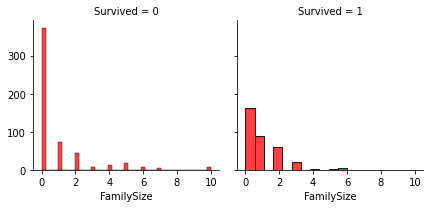

In [118]:
print(my_data['FamilySize'].value_counts())
cor = sns.FacetGrid(my_data, col="Survived")
cor.map(sns.histplot, 'FamilySize', color='red')
cor.add_legend()

This feature is not useful because the two figures are similar. The bigger the FamilySize, the less people survived and that's the same for the non-survived people. (People have small family size whether they survived or not)

In [119]:
my_data.drop('FamilySize', axis=1, inplace=True) #dropping the unuseful column

In [120]:
#Changing the categorical features to numerical
my_data['Sex'] = encoder().fit_transform(my_data['Sex'])
my_data['Embarked'] = encoder().fit_transform(my_data['Embarked'])
my_data['Title'] = encoder().fit_transform(my_data['Title'])
my_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,0,2,1,28.0,13.0000,2,2
1,0,3,1,25.0,7.6500,2,2
2,0,3,1,20.0,7.8542,2,2
3,0,3,0,29.0,21.0750,2,2
4,0,1,1,31.0,52.0000,2,2


**Checkpoint 7**

In [121]:
#Splitting data
x = my_data.iloc[: , 1:].values
y = my_data['Survived'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=0)

In [122]:
model = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, max_leaf_nodes=5)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
acc = round(metrics.accuracy_score(predictions, y_test), 2)
print('Accuracy:',acc)

Accuracy: 0.8


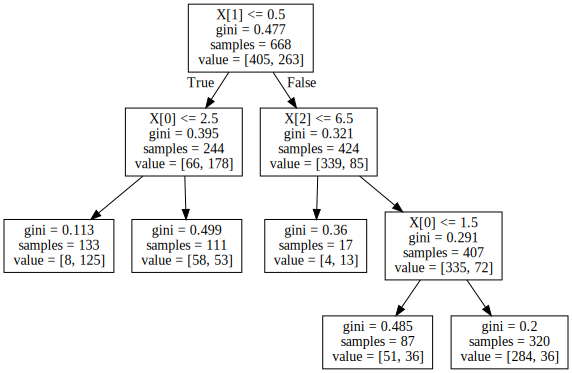

In [123]:
dot_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('data')
graph

We split all the training data according to sex. Then, we split the female passengers to 133 in first and second class and 111 in third class. The males are split according to their age. The male passengers over the age of 6 and a half are further split to first class and other classes, the male passengers under that age end up in a leave node.

*   125 female passengers in the first and second class survived but 8 didn't.
*   53 female passengers in the third class survived and 58 didn't.
*   13 male passengers under the age of 6 and a half survived but 4 didn't.
*   36 first class male passengers over the age of 6 and a half survived but 51 didn't.
*   36 male passengers over the age of 6 and a half in the second and third class survived survived but 284 didn't.







In [124]:
model2 = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10, max_leaf_nodes=30)
model2.fit(x_train, y_train)
predictions2 = model2.predict(x_test)
acc2 = round(metrics.accuracy_score(predictions2, y_test), 2)
print('Accuracy:',acc2)

Accuracy: 0.85


By increasing the maximum depth of the decision tree and the maximum leaves number, the accuracy of our model increases by 5%.

In [165]:
model3 = RandomForestClassifier(n_estimators=3)
model3.fit(x_train, y_train)
predictions3 = model3.predict(x_test)
acc3 = round(metrics.accuracy_score(predictions3, y_test), 2)
print('Accuracy:',acc3)

Accuracy: 0.79


In [174]:
model4 = RandomForestClassifier(n_estimators=1000)
model4.fit(x_train, y_train)
predictions4 = model4.predict(x_test)
acc4 = round(metrics.accuracy_score(predictions4, y_test), 2)
print('Accuracy:',acc4)

Accuracy: 0.86


When we increase the number of estimators, the accuracy of our random forest model increases(The random forest with a high estimators number has the highest accuracy out of all the 4 models).